<a href="https://colab.research.google.com/github/Nwosu-Ihueze/first_deploy/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
img_dir = ('/content/drive/MyDrive/image_classifier/dataset')

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [5]:
data_args = dict(rescale=1./255, validation_split=.20)

In [6]:
bag_train = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

train_gen = bag_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))


bag_val = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

val_gen = bag_val.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 1600 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [7]:
for image_batch, label_batch in train_gen:
  break
  image_batch.shape, label_batch.shape

In [8]:
print (train_gen.class_indices)

{'Backpack': 0, 'Briefcase': 1, 'Duffle': 2, 'Handbag': 3, 'Purse': 4}


In [9]:
base_model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])
base_model.build([None, 224, 224, 3])
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

base_model.compile(
 optimizer=optimizer,
 loss= 'categorical_crossentropy',
 metrics=['accuracy'])

In [11]:
epochs=10
history = base_model.fit(
  train_gen,
  validation_data = val_gen,
  epochs = epochs
)

Epoch 1/10
50/50 [==============================] - 732s 15s/step - loss: 1.5411 - accuracy: 0.3920 - val_loss: 0.6557 - val_accuracy: 0.7775
Epoch 2/10
50/50 [==============================] - 69s 1s/step - loss: 0.7380 - accuracy: 0.7325 - val_loss: 0.5476 - val_accuracy: 0.8100
Epoch 3/10
50/50 [==============================] - 69s 1s/step - loss: 0.6234 - accuracy: 0.7631 - val_loss: 0.5097 - val_accuracy: 0.8250
Epoch 4/10
50/50 [==============================] - 68s 1s/step - loss: 0.5016 - accuracy: 0.8327 - val_loss: 0.5041 - val_accuracy: 0.8150
Epoch 5/10
50/50 [==============================] - 67s 1s/step - loss: 0.4623 - accuracy: 0.8423 - val_loss: 0.4924 - val_accuracy: 0.8250
Epoch 6/10
50/50 [==============================] - 68s 1s/step - loss: 0.4332 - accuracy: 0.8603 - val_loss: 0.4736 - val_accuracy: 0.8350
Epoch 7/10
50/50 [==============================] - 68s 1s/step - loss: 0.3782 - accuracy: 0.8713 - val_loss: 0.4733 - val_accuracy: 0.8325
Epoch 8/10
50/50 [

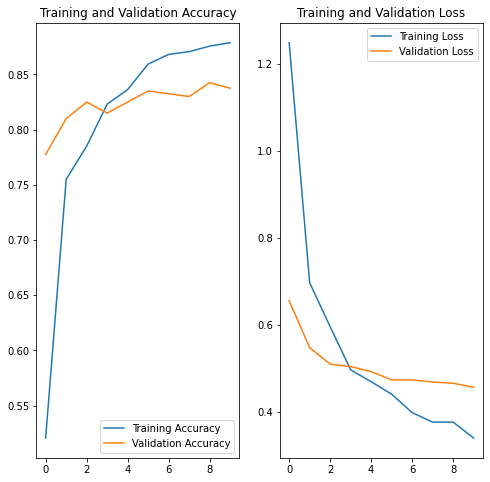

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
import pickle
from sklearn.externals import joblib 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [23]:
file_dir = '/content/drive/MyDrive/image_classifier/base_dir.h5'
base_model.save(file_dir)